In [14]:
import pandas as pd
import numpy as np
import cv2
import os
import random as rd
import matplotlib.pyplot as plt

In [2]:
CONFIG = {
    'data_path' : '../data/split_video.result',
    'csv_path' : '../data',
    'csv_name' : 'split_video.csv',
}

In [7]:
csv_path = os.path.join(CONFIG['csv_path'], CONFIG['csv_name'])
data_frame = pd.read_csv(csv_path)
data_frame = data_frame[data_frame['crash']>0]
data_frame.head()

,image_name,sample_id,label,frame_idx,crash,ego_involve,weather,timing
0,TRAIN_0000_7-0_1_0_0_0.jpg,TRAIN_0000,7,0,1,0,0,0
1,TRAIN_0000_7-1_1_0_0_0.jpg,TRAIN_0000,7,1,1,0,0,0
2,TRAIN_0000_7-2_1_0_0_0.jpg,TRAIN_0000,7,2,1,0,0,0
3,TRAIN_0000_7-3_1_0_0_0.jpg,TRAIN_0000,7,3,1,0,0,0
4,TRAIN_0000_7-4_1_0_0_0.jpg,TRAIN_0000,7,4,1,0,0,0


In [8]:
data_frame['weather-by-timing'] = [w+(3*t) for w,t in zip(data_frame['weather'].values, data_frame['timing'].values)]

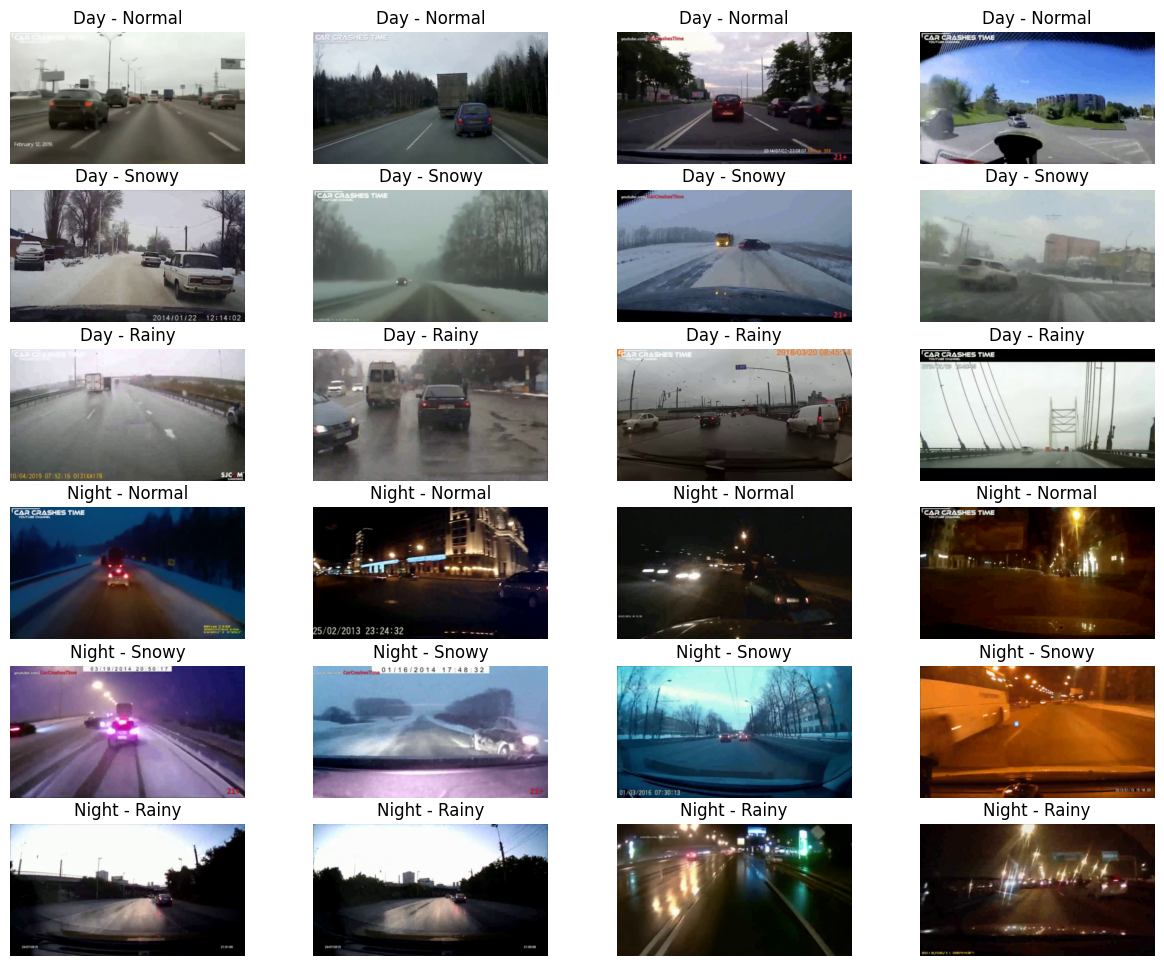

In [20]:
decode_map = {#Day/Night Normal Snowy Rainy
    0 : "Day - Normal",
    1 : "Day - Snowy",
    2 : "Day - Rainy",
    3 : "Night - Normal",
    4 : "Night - Snowy",
    5 : "Night - Rainy",
}
fig = plt.figure(figsize=(15,12))
rows = 6
cols = 4
r = rd.Random()

for i in range(cols * rows):
    row = int(i / cols)
    col = i % cols
    df = data_frame[data_frame['weather-by-timing'] == row]
    idx = int(len(df) * r.random())
    image_path = os.path.join(CONFIG['data_path'], df['image_name'].values[idx])
    image = cv2.imread(image_path)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(decode_map[row])
    ax.axis('off')

plt.show()